In [1]:
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [3]:
df_imb = pd.read_csv('../groundtruth/sequence/20fps.csv')
df_sam = pd.read_csv('../groundtruth/sequence/resampled/20fps_ClusterCentroids.csv')

In [4]:
df_imb.head()

,id,classe,inizio,fine,min_AU01_r,max_AU01_r,mean_AU01_r,stdev_AU01_r,skew_AU01_r,kurt_AU01_r,...,mean_AU26_r,stdev_AU26_r,skew_AU26_r,kurt_AU26_r,min_AU45_r,max_AU45_r,mean_AU45_r,stdev_AU45_r,skew_AU45_r,kurt_AU45_r
0,5,2,236,255,0.05,4.08,1.2480,1.0763,1.1397,0.8312,...,1.1315,0.6155,-0.2812,-1.0689,0.0,2.03,0.6030,0.6573,1.1497,0.0265
1,5,2,237,256,0.11,4.50,1.4705,1.2599,1.1360,0.4327,...,1.2090,0.6148,-0.4548,-0.8771,0.0,2.03,0.6315,0.6457,1.1057,0.0138
2,5,2,238,257,0.13,4.50,1.6740,1.3538,0.9370,-0.3138,...,1.2775,0.6008,-0.6726,-0.5325,0.0,2.03,0.6460,0.6377,1.0981,0.0447
3,5,2,239,258,0.20,4.50,1.8580,1.3827,0.7417,-0.8191,...,1.3335,0.5425,-0.7855,0.0493,0.0,2.03,0.6515,0.6343,1.0988,0.0632
4,5,3,270,289,0.00,0.70,0.1760,0.2246,1.1434,0.0861,...,0.0000,0.0000,0.0000,-3.0000,0.0,0.26,0.0600,0.0816,1.4939,1.2192


In [5]:
df_sam.head()

,min_AU01_r,max_AU01_r,mean_AU01_r,stdev_AU01_r,skew_AU01_r,kurt_AU01_r,min_AU02_r,max_AU02_r,mean_AU02_r,stdev_AU02_r,...,skew_AU26_r,kurt_AU26_r,min_AU45_r,max_AU45_r,mean_AU45_r,stdev_AU45_r,skew_AU45_r,kurt_AU45_r,id,classe
0,0.16,0.30,0.2325,0.0374,0.0221,-0.7158,0.0,0.0,0.0,0.0,...,0.0000,-3.0000,0.73,1.08,0.8875,0.1068,0.2085,-1.2555,13,0
1,0.00,0.21,0.0585,0.0555,1.3582,1.3440,0.0,0.0,0.0,0.0,...,0.8389,-0.8126,0.00,0.41,0.2140,0.1647,-0.1629,-1.5937,13,0
2,0.00,0.17,0.0265,0.0548,1.9666,2.3732,0.0,0.0,0.0,0.0,...,1.7034,1.9084,0.00,1.42,0.7540,0.4362,-0.2864,-0.9831,13,0
3,0.00,0.00,0.0000,0.0000,0.0000,-3.0000,0.0,0.0,0.0,0.0,...,0.3818,-1.5040,0.00,0.31,0.0810,0.1204,0.8982,-1.0077,13,0
4,0.13,0.38,0.2715,0.0769,-0.2395,-1.1679,0.0,0.0,0.0,0.0,...,1.2625,1.1724,0.00,0.54,0.2735,0.1636,0.0768,-1.0378,13,0


In [6]:
target = 'classe'
try: df_imb.drop(["inizio", "fine"], axis = 1, inplace=True)
except Exception as e: print(e)
df_imb

,id,classe,min_AU01_r,max_AU01_r,mean_AU01_r,stdev_AU01_r,skew_AU01_r,kurt_AU01_r,min_AU02_r,max_AU02_r,...,mean_AU26_r,stdev_AU26_r,skew_AU26_r,kurt_AU26_r,min_AU45_r,max_AU45_r,mean_AU45_r,stdev_AU45_r,skew_AU45_r,kurt_AU45_r
0,5,2,0.05,4.08,1.2480,1.0763,1.1397,0.8312,0.00,2.68,...,1.1315,0.6155,-0.2812,-1.0689,0.0,2.03,0.6030,0.6573,1.1497,0.0265
1,5,2,0.11,4.50,1.4705,1.2599,1.1360,0.4327,0.00,2.68,...,1.2090,0.6148,-0.4548,-0.8771,0.0,2.03,0.6315,0.6457,1.1057,0.0138
2,5,2,0.13,4.50,1.6740,1.3538,0.9370,-0.3138,0.00,2.68,...,1.2775,0.6008,-0.6726,-0.5325,0.0,2.03,0.6460,0.6377,1.0981,0.0447
3,5,2,0.20,4.50,1.8580,1.3827,0.7417,-0.8191,0.00,2.68,...,1.3335,0.5425,-0.7855,0.0493,0.0,2.03,0.6515,0.6343,1.0988,0.0632
4,5,3,0.00,0.70,0.1760,0.2246,1.1434,0.0861,0.83,1.70,...,0.0000,0.0000,0.0000,-3.0000,0.0,0.26,0.0600,0.0816,1.4939,1.2192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27961,20,2,0.02,0.65,0.2145,0.2036,1.0902,-0.0863,0.00,0.11,...,1.5255,0.2898,-0.2200,-0.9741,0.0,0.00,0.0000,0.0000,0.0000,-3.0000
27962,20,4,0.00,2.77,1.0455,1.1403,0.4736,-1.5069,0.00,0.17,...,0.5690,0.5268,0.3688,-1.3111,0.0,0.01,0.0015,0.0037,1.9604,1.8431
27963,20,4,0.00,2.77,1.0455,1.1403,0.4736,-1.5069,0.00,0.17,...,0.6455,0.5504,0.2398,-1.3901,0.0,0.01,0.0015,0.0037,1.9604,1.8431
27964,20,4,0.00,2.77,1.0530,1.1335,0.4775,-1.5027,0.00,0.17,...,0.7255,0.5676,0.1180,-1.4208,0.0,0.01,0.0015,0.0037,1.9604,1.8431


In [7]:
try: df_sam.drop(["inizio", "fine"], axis = 1, inplace=True)
except Exception as e: print(e)
df_sam

"['inizio' 'fine'] not found in axis"


,min_AU01_r,max_AU01_r,mean_AU01_r,stdev_AU01_r,skew_AU01_r,kurt_AU01_r,min_AU02_r,max_AU02_r,mean_AU02_r,stdev_AU02_r,...,skew_AU26_r,kurt_AU26_r,min_AU45_r,max_AU45_r,mean_AU45_r,stdev_AU45_r,skew_AU45_r,kurt_AU45_r,id,classe
0,0.16,0.30,0.2325,0.0374,0.0221,-0.7158,0.0,0.0,0.0,0.0,...,0.000000,-3.000000,0.73,1.080000,0.887500,0.106800,0.208500,-1.255500,13,0
1,0.00,0.21,0.0585,0.0555,1.3582,1.3440,0.0,0.0,0.0,0.0,...,0.838900,-0.812600,0.00,0.410000,0.214000,0.164700,-0.162900,-1.593700,13,0
2,0.00,0.17,0.0265,0.0548,1.9666,2.3732,0.0,0.0,0.0,0.0,...,1.703400,1.908400,0.00,1.420000,0.754000,0.436200,-0.286400,-0.983100,13,0
3,0.00,0.00,0.0000,0.0000,0.0000,-3.0000,0.0,0.0,0.0,0.0,...,0.381800,-1.504000,0.00,0.310000,0.081000,0.120400,0.898200,-1.007700,13,0
4,0.13,0.38,0.2715,0.0769,-0.2395,-1.1679,0.0,0.0,0.0,0.0,...,1.262500,1.172400,0.00,0.540000,0.273500,0.163600,0.076800,-1.037800,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27955,0.00,0.00,0.0000,0.0000,0.0000,-3.0000,0.0,0.0,0.0,0.0,...,0.439088,-1.149635,0.00,0.000000,0.000000,0.000000,0.000000,-3.000000,7,4
27956,0.00,0.00,0.0000,0.0000,0.0000,-3.0000,0.0,0.0,0.0,0.0,...,0.379931,-1.235232,0.00,0.000000,0.000000,0.000000,0.000000,-3.000000,7,4
27957,0.00,0.00,0.0000,0.0000,0.0000,-3.0000,0.0,0.0,0.0,0.0,...,0.370775,-1.219902,0.00,0.000000,0.000000,0.000000,0.000000,-3.000000,7,4
27958,0.00,0.00,0.0000,0.0000,0.0000,-3.0000,0.0,0.0,0.0,0.0,...,0.392081,-1.241186,0.00,0.000000,0.000000,0.000000,0.000000,-3.000000,7,4


In [8]:
X = df_imb.loc[:, df_imb.columns!=target]

In [9]:
Y = df_imb.loc[:, df_imb.columns==target]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42) 

id  classe
5   0         1835
    1         1412
    2          382
    3         5181
    4          556
7   0          726
    1         1971
    2          202
    3          816
    4           43
13  0          935
    1         1043
    2          264
    3          718
    4          428
16  0           79
    1          418
    2          394
    3         3845
    4           84
18  0          615
    1          717
    2          342
    3         1607
    4          253
20  0          187
    1         1233
    2          389
    3         1101
    4          190
dtype: int64


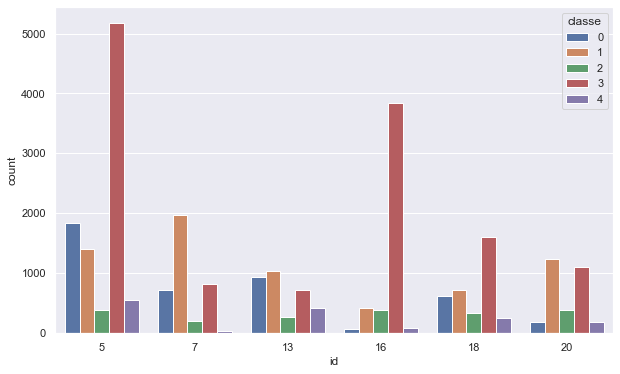

In [15]:
ax = sns.countplot(x="id", hue="classe", data=df_imb)
print(df_imb.groupby(["id", "classe"]).size())

16    4660
18    4660
20    4660
5     4660
7     4660
13    4660
Name: id, dtype: int64


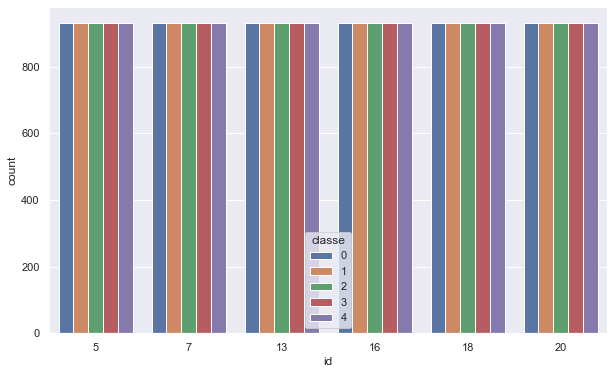

In [ ]:
ax = sns.countplot(x="id", hue="classe", data=df_sam)
print(df_sam["id"].value_counts())

<AxesSubplot:xlabel='id'>

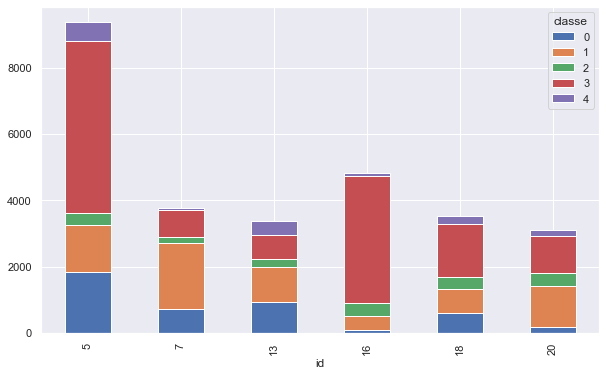

In [ ]:
df_plot = df_imb.groupby(["id", 'classe']).size().reset_index().pivot(columns='classe', index='id', values=0)
df_plot.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='id'>

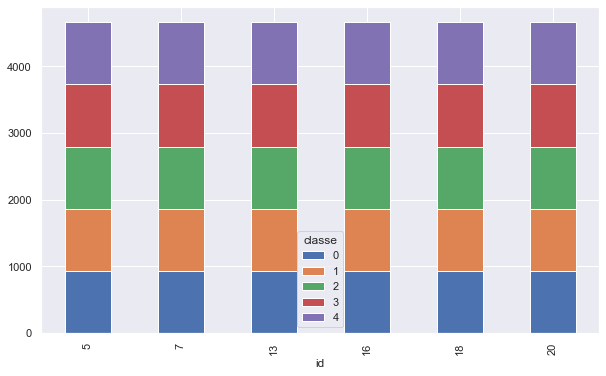

In [ ]:
df_plot = df_sam.groupby(["id", 'classe']).size().reset_index().pivot(columns='classe', index='id', values=0)
df_plot.plot(kind='bar', stacked=True)

3    13268
1     6794
0     4377
2     1973
4     1554
Name: classe, dtype: int64


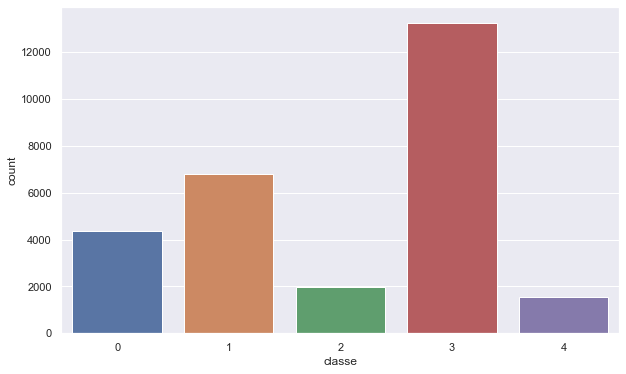

In [ ]:
ax = sns.countplot(x=target, data=df_imb)
print(df_imb[target].value_counts())

3    13268
1     6794
0     4377
2     1973
4     1554
Name: classe, dtype: int64


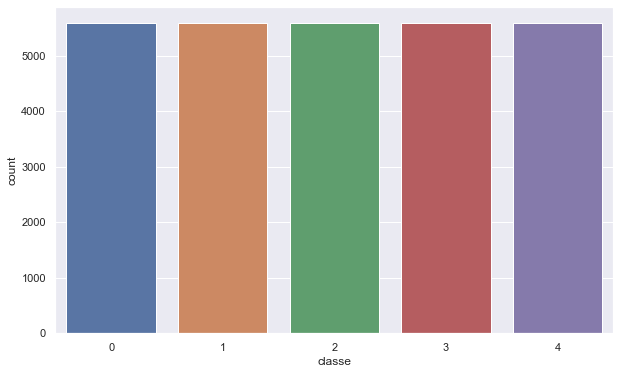

In [ ]:
ax = sns.countplot(x=target, data=df_sam)
print(df_imb[target].value_counts())

In [ ]:
classes = df_imb[target].value_counts()
ids = df_imb["id"].value_counts()

In [ ]:
Y_train[target].value_counts()

3    9985
1    5118
0    3241
2    1472
4    1158
Name: classe, dtype: int64

# Weighted classes

In [ ]:
unique_classes = sorted(list(df_imb[target].unique()))

In [ ]:
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = df_imb.shape[0]/((df_imb.loc[df_imb[target] == classes].shape[0])
                                     *len(unique_classes))

In [ ]:
out_dict

{0: 1.2778615490061687,
 1: 0.8232558139534883,
 2: 2.8348707551951344,
 3: 0.42155562255049744,
 4: 3.599227799227799}

In [ ]:
print (X_train.shape, Y_train.shape)

(20974, 103) (20974, 1)
